In [1]:
import numpy as np
import pandas as pd

In [ ]:
class LinearRegression:

    def __init__(self, lr = 0.001 , n_iter = 1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weight = None
        self.bias = None

    def fit(self , X , y):
        n_samples , n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iter):

            y_pred = np.dot(X , self.weight) + self.bias

            dw = (1/n_samples) * np.dot(X.T , (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weight -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self , X):
        return np.dot(X , self.weight) + self.bias

In [3]:
df = pd.read_csv('Salary_dataset.csv')

In [4]:
df.drop(columns='Unnamed: 0' , inplace=True)

In [5]:
X , y = df[['YearsExperience']] , df['Salary']

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [7]:
model = LinearRegression(lr = 0.01 , n_iter=3000)
model.fit(X_train,y_train)

In [8]:
y_pred = model.predict(X_test)

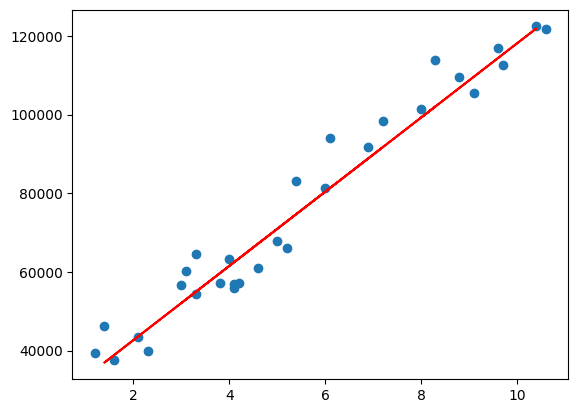

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X_test,y_pred,c='r')

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.939757133759811
